# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

###  Objective 


Accurate salary predictions help any company to recruit and retain the best employers or talent. In order to do this, there has to be a guideline to providing competitive compensation, job satisfaction, and conducive work environment for future employers. By doing so, the company will effectively control its financial system. 


Machine learning techniques are very useful in this regard to create a model that will predict a salary using features, such as years of experience, college degree, job type, industry, and miles from a metropolis. To accomplish the objective, a training dataset, which contains the abovementioned features and the respective salaries. Part of this training dataset, which is twenty percent, was split into a test dataset with corresponding salaries to determine the accuracy and error of the model. 


A testing dataset with no salary information was used as a substitute for real-world data. 

1. Years Experience: How many years of experience
2. Job Type: The position held (CEO, CFO, CTO, Vice President, Manager, Janitor, and senior or junior position)
3. College Degree: Doctoral, Masters, Bachelors, High School, or None
4. College Major: Biology, Business, Chemistry, Computer Science, Engineering, Literature, Math, Physics, or None
5. Industry: Auto, Education, Finance, Health, Oil, Service, or Web
6. Miles From Metropolis: How many miles away from a major city



In [7]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns 
sns.set_color_codes('deep')
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
__author__ = "Ermias Kassaye"
__email__ = "jeremyabebe@gmail.com"

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
#load the data into a Pandas dataframe
Train_data = pd.read_csv("data/train_features.csv", index_col='jobId')

In [5]:
#Open data here. This command will print 10 rows of training data
print('The following output shows the first ten rows of the train data')
Train_data.head(10)

The following output shows the first ten rows of the train data


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54


In [6]:
# This part will print the shape of the data o
print('The shape of the data can be seen here. ')
Train_data.shape

The shape of the data can be seen here. 


(1000000, 7)

In [5]:
# This part of the code will prnt descriptive statistics of the numerical data

print('The descriptive statistics is shown below')

Train_data.describe()

The descriptive statistics is shown below


,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


### ---- 3 Clean the data ----

In [6]:
#Let us print the descriptive statistics of the categorical data 
print('We can see the info about the date here.')

Train_data.info()

We can see the info about the date here.
<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 7 columns):
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(5)
memory usage: 61.0+ MB


In [7]:
#Let check whether there are columns with null values 
print('The null values of the given data are dispalyed here.')

Train_data.isnull().any()

The null values of the given data are dispalyed here.


companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [8]:
# Let us check that whether there are duplicated records in the dataset

print("Duplicated dataset in the training set: ", Train_data.duplicated().sum())

Duplicated dataset in the training set:  8001


In [9]:
# Let us check for unique values in training data 

print('The unique values of the training data are shown below.')

Train_data.nunique().sort_values(ascending = False)

The unique values of the training data are shown below.


milesFromMetropolis    100
companyId               63
yearsExperience         25
major                    9
jobType                  8
industry                 7
degree                   5
dtype: int64

Observation:

1.The training data has 100000 and 8 columns. 
2. The data has 2 int and 6 objects
3. milesFromMetropolis is the target valiable.
4. No null values recorded in the training data. 


In [10]:
#A copy of data before starting the training

print('The copy of the data')
Train_data_First = Train_data.copy()

The copy of the data


In [11]:
# Data imbalance is calculated here 

Train_data.milesFromMetropolis.value_counts(normalize= True)

99    0.010180
62    0.010175
63    0.010159
97    0.010155
41    0.010147
92    0.010141
39    0.010135
85    0.010128
95    0.010125
64    0.010123
0     0.010123
81    0.010119
58    0.010119
17    0.010109
3     0.010106
48    0.010104
28    0.010095
71    0.010095
56    0.010092
1     0.010091
96    0.010090
93    0.010089
53    0.010088
51    0.010080
30    0.010078
72    0.010063
19    0.010058
88    0.010057
37    0.010055
68    0.010053
        ...   
43    0.009946
31    0.009937
76    0.009935
59    0.009935
79    0.009933
70    0.009932
86    0.009931
91    0.009929
47    0.009929
35    0.009928
82    0.009928
15    0.009927
74    0.009926
42    0.009925
77    0.009924
80    0.009913
55    0.009909
46    0.009902
89    0.009893
32    0.009888
8     0.009888
65    0.009882
52    0.009875
73    0.009855
24    0.009854
26    0.009845
6     0.009840
18    0.009824
87    0.009815
20    0.009807
Name: milesFromMetropolis, Length: 100, dtype: float64

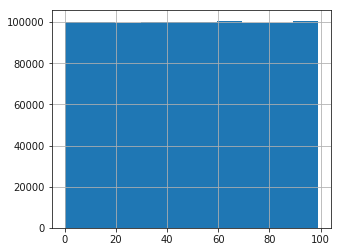

In [12]:
#Let us plot the ratio of data imbalance 

Train_data['milesFromMetropolis'].hist(figsize=(5,4))

In [13]:
Train_Salaries = pd.read_csv('data/train_salaries.csv',index_col= 'jobId')

print("Show me the rows and columns in train salaries:", Train_Salaries.shape)
# print 5 rows of the train salaries.
Train_Salaries.head(5)

Show me the rows and columns in train salaries: (1000000, 1)


,salary
jobId,
JOB1362684407687,130
JOB1362684407688,101
JOB1362684407689,137
JOB1362684407690,142
JOB1362684407691,163


In [14]:
Test_Fetaures = pd.read_csv('data/test_features.csv', index_col= 'jobId')

print ("Show me the rows and columns in the test features:", Test_Fetaures.shape)

Test_Fetaures.head(3)

Show me the rows and columns in the test features: (1000000, 7)


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9


In [15]:
#The features in the data are given below

Features = ['companyId','jobType', 'degree', 'major','industry','yearsExperience','milesFromMetropolis']

# Check the duplicated values here

Train_data_Dupls = Train_data[Train_data.duplicated(Features, keep = False)]

print('Give me number of rows with duplicate data in the train dataset:', len(Train_data_Dupls))

Give me number of rows with duplicate data in the train dataset: 15917


In [16]:
# let us salary column to 'Train_data'

Train_add_salary = Train_data.join(Train_Salaries)

print ("Show me rows and columns in the Train_add_salary:",Train_data.shape)

Train_add_salary.head(10)

Show me rows and columns in the Train_add_salary: (1000000, 7)


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31


In [17]:
Features2 =  ['companyId','jobType', 'degree', 'major','industry','yearsExperience','milesFromMetropolis','salary']

#Figure out the duplicated records for the Train_add_salary

Train_add_salary_dupls = Train_add_salary[Train_add_salary.duplicated(Features2, keep = False)]

print ("I want to see the number of rows with duplicated data in Train_add_salary:", len(Train_add_salary_dupls))

I want to see the number of rows with duplicated data in Train_add_salary: 372


In [18]:
#Let us see the duplicated records 

Dupls_add_salary = Train_add_salary[Train_data.duplicated(Features, keep = False)]

Dupls_add_salary.sort_values(Features).head(10)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362685003735,COMP0,CEO,BACHELORS,BIOLOGY,SERVICE,23,34,214
JOB1362685283347,COMP0,CEO,BACHELORS,BIOLOGY,SERVICE,23,34,122
JOB1362685004580,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,0,82,129
JOB1362685288664,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,0,82,97
JOB1362685165440,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,15,13,125
JOB1362685283913,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,15,13,156
JOB1362684435928,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,23,94,136
JOB1362684748853,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,23,94,105
JOB1362684556793,COMP0,CEO,HIGH_SCHOOL,NONE,EDUCATION,11,63,106


In [19]:
print('')
Dupls_add_salary.describe()

,yearsExperience,milesFromMetropolis,salary
count,15917.000000,15917.000000,15917.000000
mean,11.869825,49.637683,95.311679
std,7.196198,29.097380,37.297904
min,0.000000,0.000000,17.000000
25%,6.000000,24.000000,67.000000
50%,12.000000,49.000000,91.000000
75%,18.000000,75.000000,119.000000
max,24.000000,99.000000,260.000000


In [20]:
# It is good to see the non numerical values 

Text_Features = ['companyId', 'jobType', 'degree', 'major', 'industry']

Dupls_add_salary[Text_Features].describe()

,companyId,jobType,degree,major,industry
count,15917,15917,15917,15917,15917
unique,63,8,5,9,7
top,COMP32,JANITOR,NONE,NONE,FINANCE
freq,308,6811,7409,14733,2380


In [21]:
#Drop duplicates from train_feat dataset 

Train_data.drop(Dupls_add_salary.index, inplace= True)

Train_data.shape





(984083, 7)

In [22]:
# Drop duplicates from train_feat dataset 

Train_Salaries.drop(Dupls_add_salary.index, inplace= True)
Train_Salaries.shape

(984083, 1)

In [23]:
#Review duplicates in test_feat dataset 

Filt = Test_Fetaures.duplicated(Features, keep = False)
Test_Fetaures[Filt].sort_values(Features)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
jobId,,,,,,,
JOB1362685464148,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,4,80
JOB1362686275559,COMP0,CEO,HIGH_SCHOOL,NONE,AUTO,4,80
JOB1362685526996,COMP0,CEO,HIGH_SCHOOL,NONE,HEALTH,22,83
JOB1362686243166,COMP0,CEO,HIGH_SCHOOL,NONE,HEALTH,22,83
JOB1362685975334,COMP0,CEO,NONE,NONE,EDUCATION,16,61
JOB1362686139961,COMP0,CEO,NONE,NONE,EDUCATION,16,61
JOB1362685579600,COMP0,CEO,NONE,NONE,SERVICE,17,97
JOB1362686036582,COMP0,CEO,NONE,NONE,SERVICE,17,97
JOB1362685597246,COMP0,CEO,NONE,NONE,WEB,20,43


In [24]:
# To predict the saleries, let us drop all non-unique rows 

Test_Fetaures.drop_duplicates(Features, inplace= True)
Test_Fetaures.shape

(991954, 7)

In [25]:
Train_add_salary.drop(Dupls_add_salary.index, inplace = True)
Train_add_salary.shape

(984083, 8)

In [26]:
Train_add_salary.describe()

,yearsExperience,milesFromMetropolis,salary
count,984083.000000,984083.000000,984083.000000
mean,11.994368,49.527506,116.397440
std,7.212639,28.874178,38.649051
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,89.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [27]:
#Let us see rows with zero salary 

Zero_salary = Train_add_salary['salary'] <= 0
Train_add_salary[Zero_salary]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobId,,,,,,,,
JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [28]:
#Let us drop rows with zero salary from the dataset

Train_data.drop(Train_add_salary[Zero_salary].index, inplace = True)
Train_Salaries.drop(Train_add_salary[Zero_salary].index, inplace=True)
Train_add_salary.drop(Train_add_salary[Zero_salary].index, inplace = True)
Train_Salaries


,salary
jobId,
JOB1362684407687,130
JOB1362684407688,101
JOB1362684407689,137
JOB1362684407690,142
JOB1362684407691,163
JOB1362684407692,113
JOB1362684407693,178
JOB1362684407694,73
JOB1362684407695,31


In [29]:
#Let us summerize continuous variables 
Train_add_salary.describe()

,yearsExperience,milesFromMetropolis,salary
count,984078.000000,984078.000000,984078.000000
mean,11.994390,49.527629,116.398031
std,7.212638,28.874166,38.648258
min,0.000000,0.000000,18.000000
25%,6.000000,25.000000,89.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

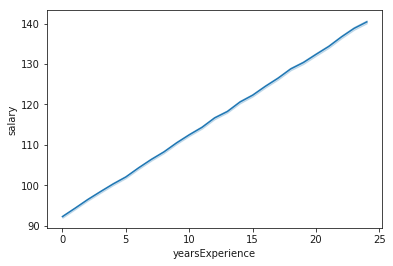

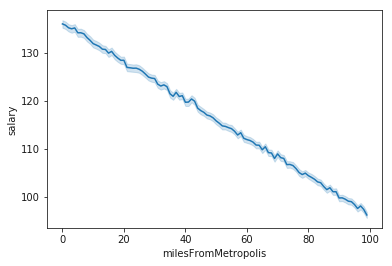

In [30]:
plt.figure()
sns.lineplot(x ='yearsExperience', y = 'salary', data = Train_add_salary)
plt.figure()
sns.lineplot(x = 'milesFromMetropolis', y ='salary', data = Train_add_salary)
#plt.grid()
plt.show


In [31]:
# Let us summarize categorical variables 

Train_add_salary[Text_Features].describe()

,companyId,jobType,degree,major,industry
count,984078,984078,984078,984078,984078
unique,63,8,5,9,7
top,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,15933,124528,229819,517620,140904


In [32]:
Train_add_salary.groupby('companyId')['salary'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
companyId,,,,,,,,
COMP53,15540.0,115.669305,38.624364,22.0,88.0,114.0,141.00,278.0
COMP37,15658.0,115.716567,38.578881,20.0,88.0,113.0,141.00,285.0
COMP57,15405.0,115.737163,38.407085,19.0,88.0,114.0,141.00,263.0
COMP42,15659.0,115.833003,38.720676,19.0,88.0,113.0,141.00,281.0
COMP31,15499.0,115.897090,38.432014,24.0,89.0,114.0,140.00,283.0
COMP54,15712.0,115.953921,38.298060,22.0,89.0,114.0,140.00,274.0
COMP18,15695.0,115.966805,38.371254,21.0,89.0,114.0,141.00,292.0
COMP45,15608.0,115.978152,38.671857,20.0,88.0,114.0,141.00,301.0
COMP30,15784.0,115.991067,38.927359,20.0,88.0,114.0,141.00,282.0


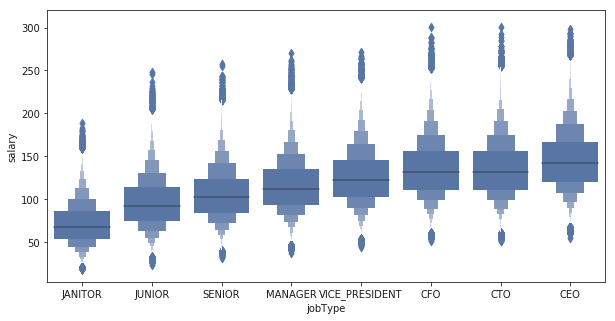

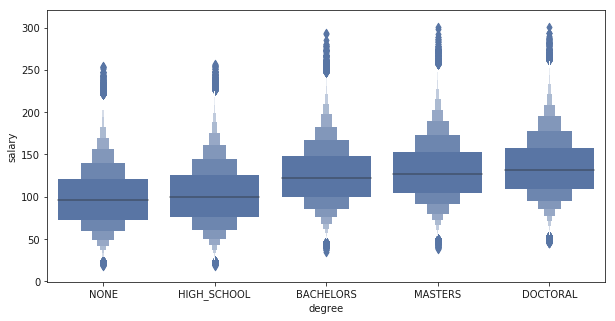

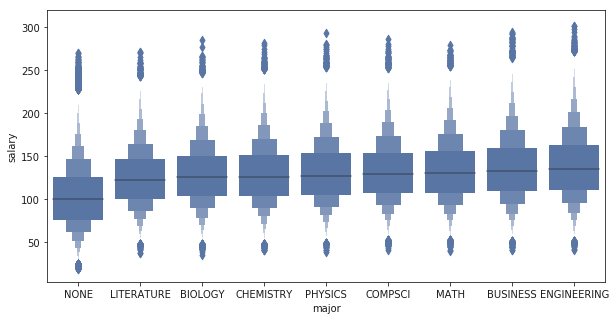

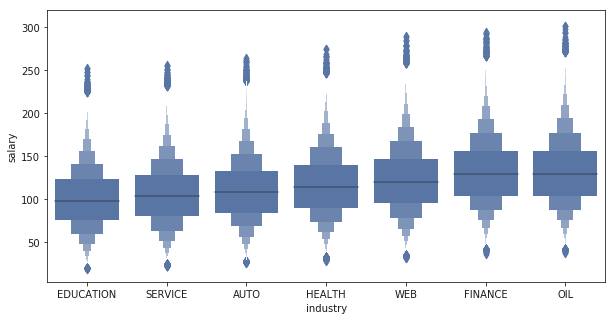

In [33]:
#Correlation between categorical variables and salary

#to_list() may not work. Hence, use tolist()

Jobtype_ranking = Train_add_salary.groupby('jobType')['salary'].median().sort_values().index.tolist()
fig_dims = (10, 5)

fig, ax = plt.subplots(figsize = fig_dims)
Jobtype_distro = sns.boxenplot(x = 'jobType', y = 'salary', color = 'b', order =Jobtype_ranking, data = Train_add_salary, ax = ax)

fig_dims = (10, 5) 

fig, ax = plt.subplots(figsize = fig_dims)

Degree_ranking = Train_add_salary.groupby('degree')['salary'].median().sort_values().index.tolist()
sns.boxenplot(data = Train_add_salary, x = 'degree', y = 'salary', color = 'b', order= Degree_ranking, ax = ax)


fig_dims = (10, 5) 




fig, ax = plt.subplots(figsize = fig_dims)

Major_ranking = Train_add_salary.groupby('major')['salary'].median().sort_values().index.tolist()

sns.boxenplot(data = Train_add_salary, x ='major', y = 'salary', color = 'b', order= Major_ranking, ax=ax)


fig_dims = (10, 5)

fig, ax = plt.subplots(figsize = fig_dims)

Industry_ranking = Train_add_salary.groupby('industry')['salary'].median().sort_values().index.tolist()


sns.boxenplot(data = Train_add_salary, x = 'industry', y = 'salary', color = 'b',order= Industry_ranking, ax = ax )






In [34]:
Baseline_df = Train_add_salary.groupby('jobType', as_index = False).mean().sort_values('salary').round(2)

Baseline_df.rename(columns = {'salary':'avg_salary'}, inplace = True)

Baseline_df = Baseline_df[['jobType','avg_salary']]

Baseline_df



,jobType,avg_salary
3,JANITOR,70.83
4,JUNIOR,95.42
6,SENIOR,105.59
5,MANAGER,115.46
7,VICE_PRESIDENT,125.47
1,CFO,135.55
2,CTO,135.58
0,CEO,145.41


In [35]:
Baseline_df = pd.merge(Train_add_salary, Baseline_df, on = 'jobType')

Baseline_df.head(5)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,avg_salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,135.55
1,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,135.55
2,COMP27,CFO,BACHELORS,CHEMISTRY,AUTO,9,70,131,135.55
3,COMP0,CFO,BACHELORS,PHYSICS,HEALTH,18,32,132,135.55
4,COMP7,CFO,BACHELORS,COMPSCI,EDUCATION,15,25,140,135.55


In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Baseline_df['salary'], Baseline_df ['avg_salary']).round(0)

966.0

In [37]:
Train_add_salary['jobType_num'] = Train_add_salary['jobType'].apply(lambda x :  Jobtype_ranking.index(x))                                                                                                

Train_add_salary['degree_num'] = Train_add_salary['degree'].apply(lambda x :  Degree_ranking.index(x))  

Train_add_salary['major_num'] = Train_add_salary['major'].apply(lambda x :  Major_ranking.index(x))  

Train_add_salary['industry_num'] = Train_add_salary['industry'].apply(lambda x : Industry_ranking.index(x))  


In [38]:
# Let us separate target from predicators 

y = Train_add_salary.salary


Train_add_salary.drop(['salary'], axis = 1, inplace = True)

#Let us select numerical columns only

Numerical_cols = [cname for cname in Train_add_salary.columns if Train_add_salary[cname].dtype in ['int64', 'float64']]

X = Train_add_salary[Numerical_cols].copy()



In [39]:
from sklearn.ensemble import RandomForestRegressor

RFG_model = RandomForestRegressor(n_estimators = 50, n_jobs = -1, random_state = 0)

from sklearn.neighbors import KNeighborsRegressor

KNR_model = KNeighborsRegressor(n_jobs=-1)

#from xgboost import XGBRegressor

#XG_model = XGBRegressor()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(RFG_model, X, y, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print('MSE scores for Random Forest Regression:\n', scores)

print('Average MSE for random Forest Regressor:', sum(scores)/5)

MSE scores for Random Forest Regression:
 [447.20043632 446.41239079 449.02204147 443.55111076 443.97782131]
Average MSE for random Forest Regressor: 446.03276013138213


In [41]:
scores = -1 * cross_val_score(KNR_model, X, y, cv = 5, n_jobs = -1, scoring = 'neg_mean_squared_error')

print('MSE scores for K nearest Neighbors Regressor:\n', scores)

print('Average MSE for K nearest Neighbors Regressors:', sum(scores)/5)

MSE scores for K nearest Neighbors Regressor:
 [442.88415982 440.94390111 443.14422303 440.80718705 439.47936753]
Average MSE for K nearest Neighbors Regressors: 441.4517677084735


In [42]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# Lke



### ---- 4 Explore the data (EDA) ----

In [43]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [44]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [45]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [46]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [47]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [48]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [49]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [50]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [51]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data